# Importando os modulos a serem utilizados

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar as cg
import matplotlib as mpl
import os
import re

In [10]:
compilado = re.compile('\d')
caminhodst = 'dados/dados/dst'

arquivos_dst = [dire for dire in os.listdir(caminhodst) if dire.endswith('.txt')]

# Tratando a base de dados *Dst* devido a existência de informações no formato de tabela descritiva ao final de cada mês.

In [9]:
for arquivo in arquivos_dst:
    ano = int(''.join(re.findall(compilado, arquivo)))
    n = 18 #tamanho da tabela descritiva

    q_dias_m = [cg.monthrange(year=ano, month=i)[1] for i in range(1, 13)] #quantidade de dias

    f = ''
    for i in q_dias_m:
        parada = n+i*24 #calculo do comprimento da janela dos dados
        with open(f'dados/dados/dst/{arquivo}', 'r') as ds:
            mes = ds.readlines()[n:parada]
            for l in mes:
                f = f+l #adiciona os dados extraidos do mes em questão para a variavel f
            n = parada+18 #calculo do novo valor onde começará a proxima interação na variavel ds(dados)

    nome_coluna = 'Data'.ljust(13)+'Hora'.ljust(11)+'dia'.ljust(12)+'dst\n'

    with open(f'dados/dados/dst/dst_limpo{ano}.txt','w') as tesla:
        tesla.write(nome_coluna)
        tesla.writelines(f)

# Leitura dos valores diarios do dst

In [ ]:
df = pd.read_fwf('dst_limpo.txt')
dst = df.groupby('dia').mean() #agrupando os valores e fazendo a media

# Lendo dados do indece kp e ap

In [ ]:
arq = '2006_kp_ap.txt'
df = pd.read_fwf(arq)
ap = df.Ap
dia = df.YYYYMMDD
kp= []
for i in df['Kp[8]           Sum']:
    i = int(i[0])
    kp.append(i)
kp = pd.Series(kp, name='kp')
df_ap_kp= pd.DataFrame()
df_ap_kp['data'], df_ap_kp['ap'], df_ap_kp['kp'] = dia, ap, kp
df_ap_kp.to_string('ap_kp.txt', index=False)
vento_M = pd.read_fwf('mean_day.200601-200608.brazil.mer', usecols=[7])
vento_z = pd.read_fwf('mean_day.200601-200608.brazil.zon', usecols=[7])
Valores = [kp, ap, dst, vento_M, vento_z]
plots = ['kp', 'ap', 'dst', 'mer', 'zon']
ylabel = ['']

FileNotFoundError: [Errno 2] No such file or directory: '2006_kp_ap.txt'

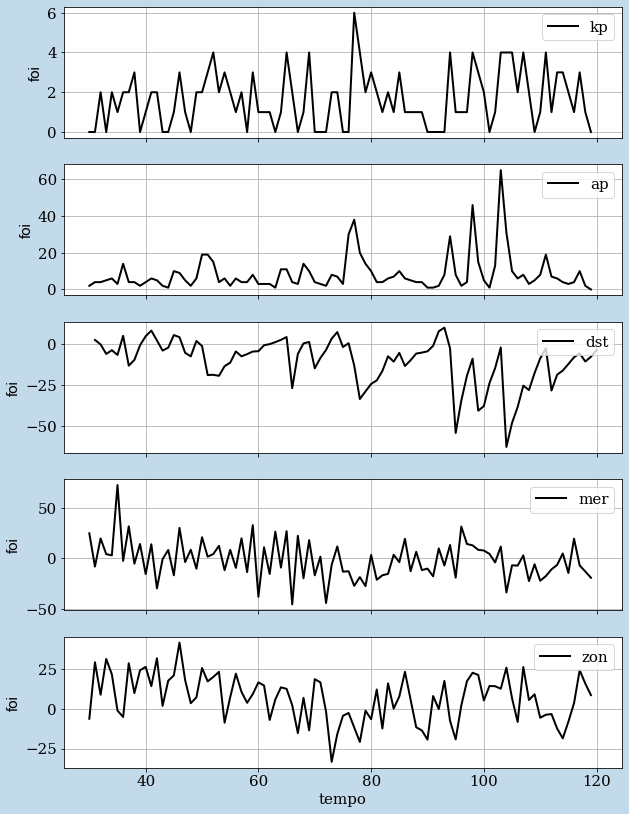

In [ ]:
mpl.rcParams['font.family'] = ['Family1', 'Serif', 'cursive']
mpl.rcParams['font.size'] = 15

fig, ax = plt.subplots(5, 1, sharex=True, figsize=(10, 14), facecolor='#C3DAEB', edgecolor='#ABC4FF')

for x, i in zip(enumerate(Valores), plots):
    ax[x[0]].plot(x[1][30:120], label=i, color='k', linestyle='solid', linewidth = 2, )
    ax[x[0]].legend(loc=1)
    ax[x[0]].set_ylabel('foi', font="Arial")
    ax[x[0]].grid()
    if i == 'zon':
        ax[x[0]].set_xlabel('tempo')

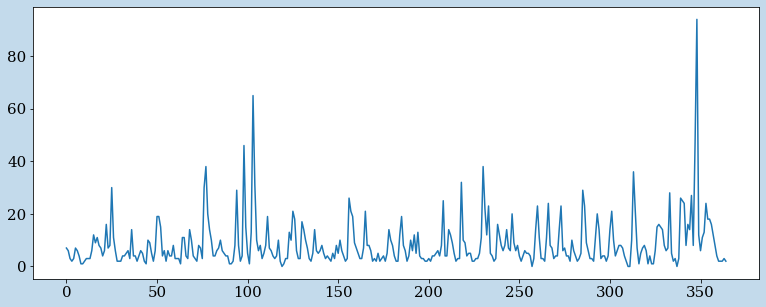

In [ ]:
fig, ax = plt.subplots(1, 1, facecolor='#C3DAEB', edgecolor='#ABC4FF', figsize=(13, 5))
ax.plot(ap)